# Live Code 1 Fase 1

## Perkenalan

- Nama: Fathur Rachman
- Batch: 003
- FTDS Hactive8

## Judul

Pada Live Code 1 Fase 1 akan mengerjakan 2 dataset. Data set pertama adalah menghitung dan memprediksi biaya asuransi yang akan ditanggung oleh pengguna. Untuk dataset kedua merupakan melakukan klasifikasi galaksi berdasarkan bentuk dari galaksi yang berada di data set. Link soal tertera dibawah

1. Asuransi : https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv
2. Galaksi : https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv

# Dataset Asuransi

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Data Loading

In [2]:
data1 = pd.read_csv('insurance.csv')
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data1.shape

(1338, 7)

In [4]:
data1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Baris kolom dataset diartikan sebagai berikut:

- Age: usia penerima manfaat utama

- Sex: jenis kelamin kontraktor asuransi, perempuan, laki-laki

- BMI: Indeks massa tubuh, memberikan pemahaman tentang tubuh, berat badan yang relatif tinggi atau rendah relatif terhadap tinggi badan, indeks objektif berat badan (kg/m^2) menggunakan rasio tinggi terhadap berat badan, idealnya 18,5 hingga 24,9

- Children Jumlah anak yang ditanggung oleh asuransi kesehatan / Jumlah tanggungan

- Smoker : pengguna asuransi memiliki kebiasaan merokok atau tidak

- Region : daerah perumahan penerima di AS, timur laut, tenggara, barat daya, barat laut.

- Charge : Biaya medis individu ditagih oleh asuransi kesehatan

### Data Cleaning

In [5]:
data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dari melakukan pencarian data diatas, dapat dilihat bahwa seluruh kolom tdak memiliki nilai yang 0. Artinya data dapat di proses lebih lanjut.

#### Melihat unique value dari data dengan tipe kategorial

In [6]:
data1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
data1['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
data1['smoker'].unique()

array(['yes', 'no'], dtype=object)

#### Melakukan data manipulasi dan mendrop kolom yang tidak akan dipakai

In [9]:
data1.drop(columns=['region'], inplace=True)
data1['sex']=data1.sex.replace({'female':0, 'male':1})
data1['smoker']=data1['smoker'].replace({'no':0, 'yes':1})
data1

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [10]:
data1.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [11]:
#Melakukan split data yang akan digunakan dalam eksplorasi data dan di tahap lainnya

x = data1[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data1[['charges']]

### Eksplorasi Data

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

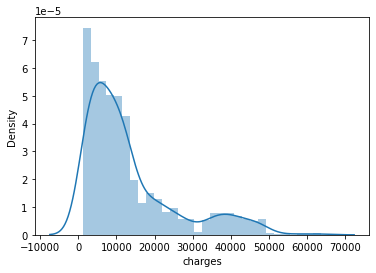

In [12]:
sns.distplot(data1['charges'])

Persebaran biaya (target) yang dikeluarkan oleh pengguna asuransi memiliki persebaran yang condong mendekati titik 0. Artinya variabel 'charges' bersifat skewness positif. Nilai dari dean dan median akan lebih besar dari modus.

<AxesSubplot:>

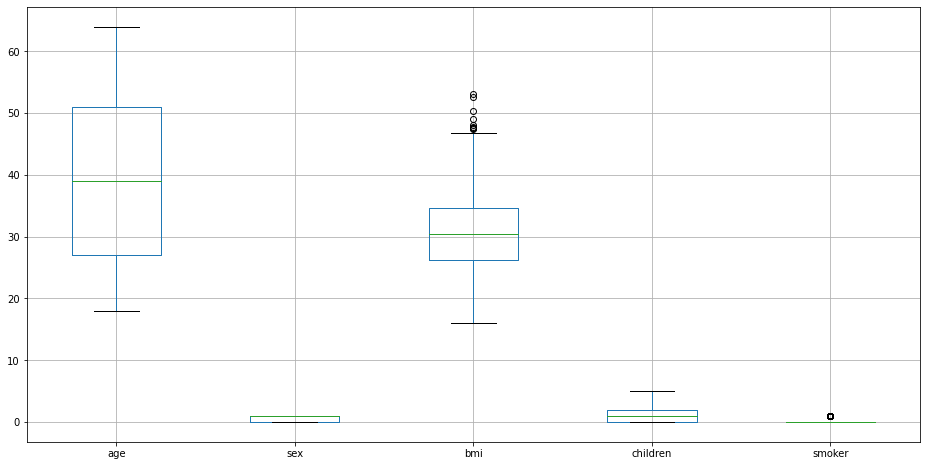

In [13]:
x.boxplot(figsize=(16,8))

Persebaran nilai data features (x) dapat terlihat dari boxplot diatas. Peneliti melakukan cara ini untuk melihat dan melakukan suatu perlakuan terhadap nilai data yang memiliki outlier. Dari hasil boxplot, dapat terlihat bahwa bmi memiliki nilai outlier. Sehingga outlier tersebut harus di drop.

<AxesSubplot:>

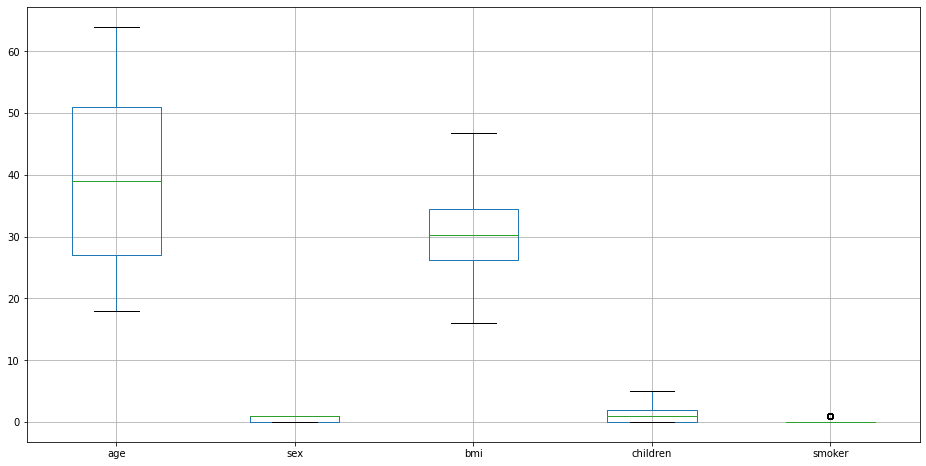

In [14]:
x[x['bmi']<47].boxplot(figsize=(16,8))

<AxesSubplot:>

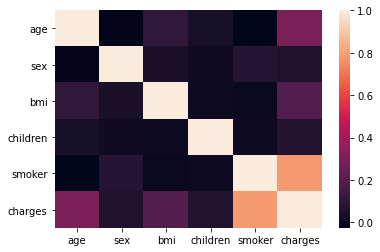

In [15]:
Corr=data1.corr()

sns.heatmap(Corr)

Dari uji korelasi didapatkan bahwa nilai dari biaya asuransi memiliki korelasi yang sangat erat dengan status apakah pengguna jasa asuransi memiliki kebiasaan merokok atau tidak. Namun, peneliti merasa bahwa features (x) yang dipilih memiliki korelasi yang dengan biaya asuransi. Oleh sebab itu akan dilakukan uji VIF untuk melakukan validasi.

In [16]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

    feature       VIF
0       age  7.545377
1       sex  2.000794
2       bmi  8.748157
3  children  1.799703
4    smoker  1.256793


In [17]:
x1 = x.drop(columns='bmi')
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]
  
print(vif_data)

    feature       VIF
0       age  2.453250
1       sex  1.839905
2  children  1.729430
3    smoker  1.237158


Setelah melakukan drop terhadap kolom feature 'bmi', dapat terlihat nilai VIF dari masing-masing features <5. Hal ini dapat diartikan bahwa nilai-nilai features yang sudah dipilih memiliki nilai korelasi yang kuat dengan target (charges).

### Data Preprocessing

Setelah melakukan data eksplorasi, maka peneliti mendapatkan kesimpulan yang nantiny akan digunakan untuk melakukan data preprocessing, diantaranya:

- Menyiapkan features (x) untuk pembuatan model (dengan membuang bmi)
- Menyiapkan target (y) (charges)
- Melakukan transformasi log pada variabel target untuk pelatihan model

#catatan: encoding terhadap variabel kategorial sudah dilakukan pada proses pada line 9

##### Menyiapkan variabel features dan target

In [18]:
#data train

x_train = x1
y_train = y

In [19]:
#data test

x_test = x1
y_test = y

##### Melakukan transformasi Log pada Target (Y) dan menyimpan pada variabel baru

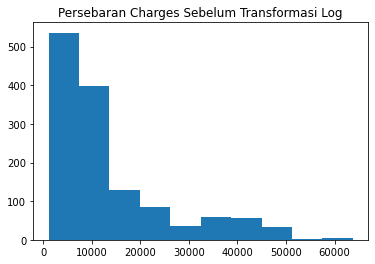

In [20]:
plt.hist(y_train)
plt.title('Persebaran Charges Sebelum Transformasi Log')
plt.show()

In [21]:
y_log = np.log(y_train)

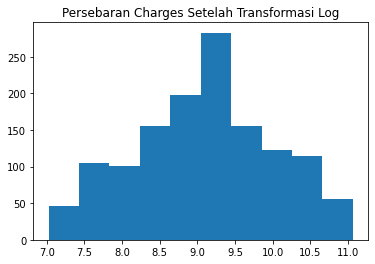

In [22]:
plt.hist(y_log)
plt.title('Persebaran Charges Setelah Transformasi Log')
plt.show()

### Pendefinisian Model

Uji model kali ini akan dilakukan dengan 3 model linear, diantaranya: Linear Regression, Rigde Regession, dan Lasso Regression

In [23]:
#Model Linear Regression

LRG = LinearRegression()

#Model Ridge Regression

RRG = Ridge(alpha=0.1)

#Model Lasso

LLG = Lasso(alpha=0.1)

### Pelatihan Model 

In [24]:
#Linear Regression

LRG.fit(x_train, y_log)

#Rigde

RRG.fit(x_train, y_log)

#Lasso

LLG.fit(x_train, y_log)

Lasso(alpha=0.1)

### Evaluasi Model 

In [25]:
# Evaluasi hasil prediksi model menggunakan data train

from sklearn.metrics import mean_absolute_error, mean_squared_error

def eval_datatrain(model, judul):
    y_train_predict = model.predict(x_train)
    
    print('Evaluasi Model %s Menggunakan Data Train\n' %judul)
    print('MSE: {:.2f}' .format(mean_squared_error(y_train, np.exp(y_train_predict))))
    print('RMSE: {:.2f}' .format(np.sqrt(mean_squared_error(y_train, np.exp(y_train_predict)))))
    print('MAE: {:.2f}' .format(mean_absolute_error(y_train, np.exp(y_train_predict))))

In [26]:
eval_datatrain(LRG, 'Linear Regression')

Evaluasi Model Linear Regression Menggunakan Data Train

MSE: 76464539.58
RMSE: 8744.40
MAE: 4291.02


In [27]:
eval_datatrain(RRG, 'Rigde Regression')

Evaluasi Model Rigde Regression Menggunakan Data Train

MSE: 76392912.92
RMSE: 8740.30
MAE: 4289.89


In [28]:
eval_datatrain(LLG, 'Lasso Regression')

Evaluasi Model Lasso Regression Menggunakan Data Train

MSE: 73767432.48
RMSE: 8588.80
MAE: 4720.90


In [29]:
# Evaluasi hasil prediksi model menggunakan data test
def eval_datatest(model, judul):
    y_test_predict = model.predict(x_test)

    print('Evaluasi Model %s Menggunakan Data Test\n' %judul)
    print('MSE: {:.2f}' .format(mean_squared_error(y_test, np.exp(y_test_predict))))
    print('RMSE: {:.2f}' .format(np.sqrt(mean_squared_error(y_test, np.exp(y_test_predict)))))
    print('MAE: {:.2f}' .format(mean_absolute_error(y_test, np.exp(y_test_predict))))

In [30]:
eval_datatest(LRG, 'Linear Regression')

Evaluasi Model Linear Regression Menggunakan Data Test

MSE: 76464539.58
RMSE: 8744.40
MAE: 4291.02


In [31]:
eval_datatest(RRG, 'Rigde Regression')

Evaluasi Model Rigde Regression Menggunakan Data Test

MSE: 76392912.92
RMSE: 8740.30
MAE: 4289.89


In [32]:
eval_datatest(LLG, 'Lasso Regression')

Evaluasi Model Lasso Regression Menggunakan Data Test

MSE: 73767432.48
RMSE: 8588.80
MAE: 4720.90


Dari uji train dan uji test dari ketiga tipe model pengujian, didapatkan kesimpulan:

1. Pengujian pada train test dan data test dari ke3 pengujian (linear, rigde, dan lasso) memiliki nilai yang sama
2. Nilai Error pada data train dan data test ditemukan pada Lasso Regression dengan nilai RMSE : 8588.80

Maka diputuskan model yang digunakan adalah Lasso Regresson dengan nilai error sebesar 8588.8

### Model Inference

Pada saat ini dilakukan pengujian dan memperkirakan berapakah harga yang harus nasabah arusansi bayar untuk mendapatkan pelayanan asuransi. Berikut komponen variabel:

Jika merokok
- Usia (age) : 28 tahun
- Jenis kelamin (sex) : 1 (pria)
- Punya berapa anak (children) : 2
- perokok atau tidak (smoker) : 1 (ya)

Jika tidak merokok
- Usia (age) : 28 tahun
- Jenis kelamin (sex) : 1 (pria)
- Punya berapa anak (children) : 2
- perokok atau tidak (smoker) : 0 (tidak)

Jika tidak merokok dan punya banyak anak (5)
- Usia (age) : 28 tahun
- Jenis kelamin (sex) : 1 (pria)
- Punya berapa anak (children) : 5
- perokok atau tidak (smoker) : 0 (tidak)

In [33]:
#Prediksi biaya yang harus dikeluarkan (jika merokok)

np.exp(LLG.predict([[28, 1, 2, 1]]))

array([13133.8472848])

In [34]:
#Prediksi biaya yang harus dikeluarkan (jika tidak merokok)

np.exp(LLG.predict([[28, 1, 2, 0]]))

array([5176.20606427])

In [35]:
#Prediksi biaya yang harus dikeluarkan (jika tidak merokok tapi punya banyak anak)

np.exp(LLG.predict([[28, 1, 5, 0]]))

array([5743.93143513])

Berdasarkan perhitungan model, diprediksi harga yang harus dikeluarkan oleh nasabah asuransi sebesar 13,133.85 USD dengan status perokok. Namun lain halnya jika tidak merokok hanya mengeluarkan biaya sebesar 5176.21 USD dan tidak merokok tetapi punya 5 anak tidak jauh berbeda dan hanya dikenakan biaya sebesar 5743.93 USD

### Kesimpulan

Variabel features (x) memiliki korelasi sangat erat dengan variabel target (y) adalah status perokok. Sementara sisanya tidak memiliki relasi yang kuat dengan harga seperti usia, jenis kelamin, memiliki anak berapa. Dari hasil uji prediksi dapat terlihat bahwa orang yang memiliki status perokok akan dikenakan biaya yang sangat mahal bahkan hingga lebih dari 2 kali lipat dibandingkan dengan orang yang tidak merokok dan tidak merokok namun memiliki banyak anak.

Kesimpulannya adalah: jika mau menggunakan jasa asuransi maka terapkan pola hidup sehat dan BERHENTI MEROKOK! KARENA MEROKOK MEMBUNUHMU DAN BIKIN MISKIN!

# Dataset Galaksi

In [37]:
data2 = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv')
data2.head()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   TType                20000 non-null  float64
 2   K                    20000 non-null  float64
 3   C                    20000 non-null  float64
 4   A                    20000 non-null  float64
 5   S                    20000 non-null  float64
 6   G2                   20000 non-null  float64
 7   H                    20000 non-null  float64
 8   CNN2classes1stClass  20000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


### Data Cleaning

In [41]:
data2.isnull().sum()

Unnamed: 0             0
TType                  0
K                      0
C                      0
A                      0
S                      0
G2                     0
H                      0
CNN2classes1stClass    0
dtype: int64

Hanya ambil kolom C,A,S,G2,dan H untuk dijadikan feature

In [42]:
x = data2[['C', 'A', 'S', 'G2', 'H']]
y = data2[['CNN2classes1stClass']]

In [46]:
x.head()

,C,A,S,G2,H
0,0.357051,0.932151,0.850992,1.588183,0.697214
1,0.313292,0.610999,0.723122,1.533653,0.719412
2,0.408286,0.881524,0.813231,1.743747,0.750872
3,-9999.999999,0.838779,0.816965,1.672529,0.771995
4,0.446453,0.839216,0.801140,1.107665,0.610453


In [47]:
y.head()

,CNN2classes1stClass
0,1
1,1
2,1
3,1
4,1


### Data Preprocessing

##### Menyiapkan variabel features dan target

In [48]:
#data train

x_train = x
y_train = y

In [50]:
#data test

x_test = x
y_test = y

### Confusion matrix, Classification, Accuracy Score

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[  629  3227]
 [  595 15549]]
              precision    recall  f1-score   support

           0       0.51      0.16      0.25      3856
           1       0.83      0.96      0.89     16144

    accuracy                           0.81     20000
   macro avg       0.67      0.56      0.57     20000
weighted avg       0.77      0.81      0.77     20000

0.8089
